<a href="https://colab.research.google.com/github/carneiro-fernando/lighthouse/blob/main/Desafio_Lighthouse_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introdução

### **1.1 Bibliotecas**

In [116]:
# Importação de pacotes
import os
import warnings

import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Polygon, Point
from IPython.display import Image

In [78]:
# Desabilitar todos os avisos
warnings.filterwarnings("ignore")

###**1.2 Importação dos Dados**

In [2]:
file_path = "/content/teste_indicium_precificacao.csv"

# Baixar o arquivo caso ele não exista
if not os.path.exists(file_path):
    !wget https://raw.githubusercontent.com/carneiro-fernando/lighthouse/main/datasource/teste_indicium_precificacao.csv

# Leitura do arquivo e criação do DataFrame
df = pd.read_csv(file_path)

--2024-02-06 22:54:25--  https://raw.githubusercontent.com/carneiro-fernando/lighthouse/main/datasource/teste_indicium_precificacao.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077542 (6.7M) [text/plain]
Saving to: ‘teste_indicium_precificacao.csv’

teste_indicium_prec 100%[===================>]   6.75M  --.-KB/s    in 0.06s   

2024-02-06 22:54:26 (110 MB/s) - ‘teste_indicium_precificacao.csv’ saved [7077542/7077542]




###**1.3 Descrição dos Dados** (*schema*)

Abaixo segue uma tabela com a descrição de cada uma das colunas do DataFrame:


| **Coluna** | **Nome**                   | **Descrição**                                                                      |
|------------|------------------------------|------------------------------------------------------------------------------------|
| 1          | id                           | Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo            |
| 2          | nome                         | Representa o nome do anúncio                                                      |
| 3          | host_id                      | Representa o id do usuário que hospedou o anúncio                                 |
| 4          | host_name                    | Contém o nome do usuário que hospedou o anúncio                                   |
| 5          | bairro_group                 | Contém o nome do bairro onde o anúncio está localizado                           |
| 6          | bairro                       | Contém o nome da área onde o anúncio está localizado                              |
| 7          | latitude                     | Contém a latitude do local                                                        |
| 8          | longitude                    | Contém a longitude do local                                                       |
| 9          | room_type                    | Contém o tipo de espaço de cada anúncio                                           |
| 10         | price                        | Contém o preço por noite em dólares listado pelo anfitrião                        |
| 11         | minimo_noites                | Contém o número mínimo de noites que o usuário deve reservar                      |
| 12         | numero_de_reviews            | Contém o número de comentários dados a cada listagem                               |
| 13         | ultima_review                | Contém a data da última revisão dada à listagem                                    |
| 14         | reviews_por_mes              | Contém o número de avaliações fornecidas por mês                                   |
| 15         | calculado_host_listings_count| Contém a quantidade de listagem por host                                           |
| 16         | disponibilidade_365         | Contém o número de dias em que o anúncio está disponível para reserva             |


Verificação do *schema*

In [3]:
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [28]:
print(f'Esses são os tipos de dados presentes: {df.dtypes.unique()}')


Esses são os tipos de dados presentes: [dtype('int64') dtype('O') dtype('float64')]


## 2. Análise Exploratória dos Dados

###**2.1 Wrangling**

Checando o número de linhas e colunas que estão presentes no DataFrame criado:

In [4]:
shape = df.shape
print(f"O DataFrame tem {shape[1]} colunas e {shape[0]} linhas.")

O DataFrame tem 16 colunas e 48894 linhas.


Investigação se há dados nulos presentes:

In [5]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Analisando as linhas nulas:

In [6]:
df[df.isnull().any(axis=1)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Perceba que a maioria dos dados nulos são referentes à colunas de avaliação (*review* ) da propriedade. Temos três opções:

*   Excluir todas as linhas com valores nulos.
*   Preencher esses valores com uma média ou técnica estatística.
*   Preencher esses valores com zero.

A opção mais apropriada é o preenchimento com o número **zero**, pois reflete com maior precisão a verdadeira condição do dados. Isso porque a coluna *numero_de_reviews* deixa claro que os dados nulos são devido à ausência de avaliação, que corresponde corretamente à quantidade zero, essa informação está correta e não há impacto negativo na análise.



Limpeza dos dados das colunas de *reviews*.

In [7]:
df[['ultima_review', 'reviews_por_mes']] = df[['ultima_review', 'reviews_por_mes']].fillna(0)

Conferir se a limpeza foi bem sucedida e analisar os outros dados nulos:

In [8]:
df.isnull().sum()

id                                0
nome                             16
host_id                           0
host_name                        21
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
ultima_review                     0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


Os valores nulos se referem agora ao nome do anúncio e ao nome do usuário responsável pelo anúncio. Referente ao nome do usuário, faremos o seguinte tratamento: reuniremos os *ids* deles e buscaremos no restante do DataFrame se há alguma linha em que se repita esse *id* e tenha o nome do usuário.

In [17]:
#  Criando DataFrame com os nomes nulos:
null_host_names = df[df['host_name'].isnull()]['host_name']

# Criando DataFrame com os ids dos usuário com nome nulo:
host_ids = df[df['host_name'].isin(null_host_names)]['host_id']

# Buscando no DataFrame pelos nomes referentes aos ids:
df[df['host_id'].isin(host_ids)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


Infelizmente, não há nenhuma outra menção dos *host_id* ligados aos *host_names* nulos. Sendo assim, por se tratar de uma quantidade pequena de dados, irei apenas remover as linhas com esses valores nulos, juntamente com as linhas em que o título do anúncio é nulo.

In [11]:
# Removendo todos os valores nulos
df = df.dropna()

# Checando se todos os valores foram removidos
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

###**2.2 Análise dos dados**

####2.2.1 Dados categóricos

Vamos ter uma visão geral dos nossos dados, começando pelos dados categóricos.

In [12]:
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
nome,48857,47883,Hillside Hotel,18
host_name,48857,11450,Michael,417
bairro_group,48857,5,Manhattan,21643
bairro,48857,221,Williamsburg,3917
room_type,48857,3,Entire home/apt,25393
ultima_review,48857,1765,0,10037


Vamos analisar brevemente os dados únicos com menor ocorrência:


In [13]:
print(f"Tipos de quarto: {df['room_type'].unique()} \n\
        Bairros: {df['bairro_group'].unique()}")

Tipos de quarto: ['Entire home/apt' 'Private room' 'Shared room'] 
        Bairros: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


**Insights:**

* É possível observar nos dados referentes aos bairros que os dados do concorrente estão corretamente direcionados somente à cidade de Nova York, que é o maior interesse de nosso cliente.

* A quantidade de valores únicos na coluna é alta, cerca de 1000 resultados são repetidos, como por exemplo a rede (*chain*) de hotéis *Hillside Hotel* que se repete 18 vezes. Isso indica que nossos dados se tratam majoritariamente de aluguéis por aplicativo (ex: Airbnb, Vrbo, Wimdu), outra evidência são os tipos de quartos que não são opções comuns em redes de hotéis.

* Segue uma tabela para facilitar a visualização dos valores mais populares:

>| Mais popular | Valor |
|---|---|
| Anúncio | Hillside Hotel |
| Anfitrião | Michael |
| Bairro | Manhattan |
| Área | Williamsburg |
| Tipo de quarto | Casa/apartamento inteiro |
| Comodidadeses | Wifi, cozinha, itens essenciais, aquecimento, ar condicionado |


####**2.2.2 Dados numéricos**

In [111]:
num_data_df = df.select_dtypes(["int64","float64"]).drop(['id', 'host_id', 'latitude', 'longitude'], axis=1)
num_data_df.describe().T # T e transpose() são métodos idênticos

,count,mean,std,min,25%,50%,75%,max
price,48857.0,152.740385,240.234843,0.0,69.00,106.00,175.00,10000.0
minimo_noites,48857.0,7.012567,20.019944,1.0,1.00,3.00,5.00,1250.0
numero_de_reviews,48857.0,23.273390,44.550307,0.0,1.00,5.00,24.00,629.0
reviews_por_mes,48857.0,1.091142,1.597281,0.0,0.04,0.37,1.58,58.5
calculado_host_listings_count,48857.0,7.148392,32.964937,1.0,1.00,1.00,2.00,327.0
disponibilidade_365,48857.0,112.796263,131.607363,0.0,0.00,45.00,227.00,365.0


**Insights:**

* Enquanto o desvio padrão é de $240,23, o preço médio é de apenas \$152,74, sugerindo assim, que há uma ampla gama de preços, com alguns anúncios sendo muito mais caros do que outros.

* O preço mediano é de $106, menor que a média aritmética, sugerindo que os preços tendem a ser em sua maioria numa faixa de preço mais baixa.

* Na coluna *calculado_host_listings_count* existe pelo menos um *outlier*, visto que o terceiro quartil tem como valor 2 mas o número máximo é 327, indicando que um dos anfitriões tem essa quantidade de propriedades.

* Há algumas discrepâncias nos dados como o número mínimo de noites ser de 1250 noites (3 anos e meio) e o preço mínimo ser de $0,00. Elas podem ser alvo de uma análise posterior.

###**2.3 Visualização dos dados**

#### 2.3.1 Localizações

In [71]:
map_df = df[['bairro', 'longitude', 'latitude']]
sns.set(context="notebook")

Vamos ver a porcentagem de propriedades que cada bairro:

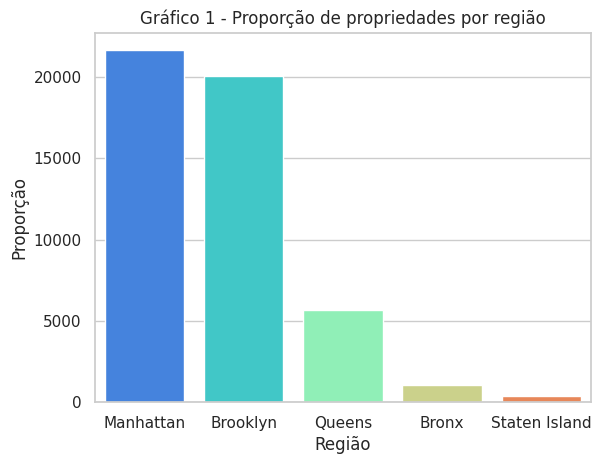

In [79]:
sns.set(context="notebook")
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df['bairro_group'].value_counts().index,
      y=df['bairro_group'].value_counts().values,
      palette='rainbow')
  grafico.set(title='Gráfico 1 - Proporção de propriedades por região',
                xlabel='Região',
                ylabel='Proporção')


*Manhattan* e *Brooklyn* são as regiões com mais propriedades disponíveis pelo concorrente, cerca de 400% em relação à região *Queens* em terceiro lugar.

####2.3.2 Preços

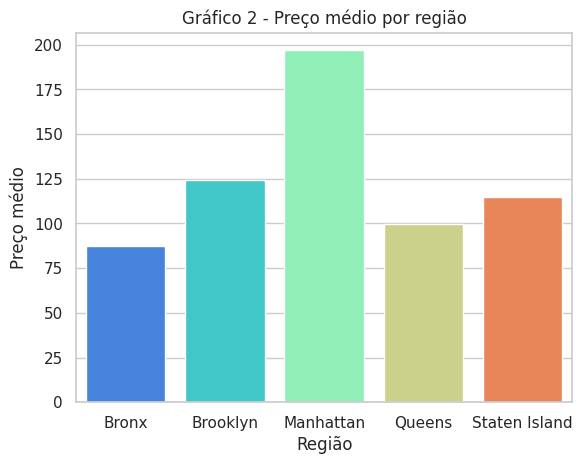

In [82]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df.groupby('bairro_group')['price'].mean().index,
      y=df.groupby('bairro_group')['price'].mean().values,
      palette='rainbow')
  grafico.set(title='Gráfico 2 - Preço médio por região',
                xlabel='Região',
                ylabel='Preço médio')

*Manhattan* é disparado a região com o maior preço médio, seguido por *Brooklyn* e *Staten Island*.

####2.3.3 Tipos de espaço

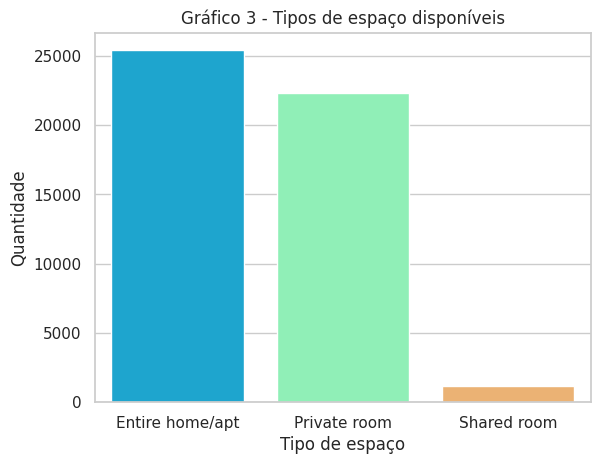

In [83]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df['room_type'].value_counts().index,
      y=df['room_type'].value_counts().values,
      palette='rainbow')
  grafico.set(title='Gráfico 3 - Tipos de espaço disponíveis',
                xlabel='Tipo de espaço',
                ylabel='Quantidade')

O concorrente não tem à disposição muitos espaços compartilhados, eles são  raros, provavelmente reflete as preferências de consumo em Nova York.

#### 2.3.4 Espaços por anfitrião

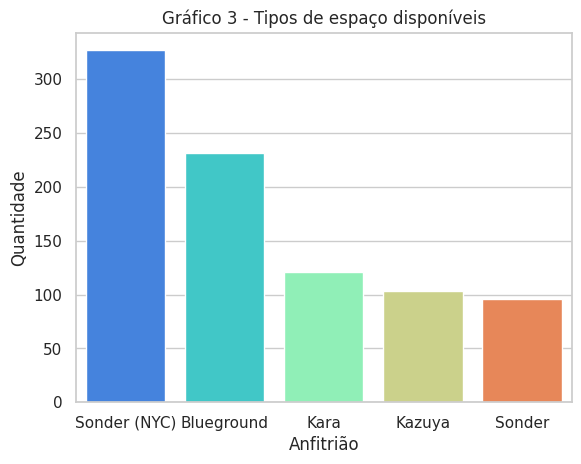

In [107]:
top5 = df['host_id'].value_counts().head(5)
top5_df = pd.DataFrame({
    'host_id': top5_df.index.to_list(),
    'host_name': [df[df['host_id'] == host_id]['host_name'].iloc[0] for host_id in top5_df.index],
    'count': top5_df.values
})

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      data=top5_df,
      x='host_name',
      y='count',
      palette='rainbow')
  grafico.set(title='Gráfico 3 - Tipos de espaço disponíveis',
                xlabel='Anfitrião',
                ylabel='Quantidade')

É possível ver uma ampla margem de vantagem com o anfitrião *Sonder (NYC)* e *Blueground*. Essas são empresas especializadas em alugar espaços em aplicativos.

source: [Blueground](https://www.theblueground.com/)
        [Sonder](https://www.sonder.com/about)

###**2.4 Correlação dos dados**

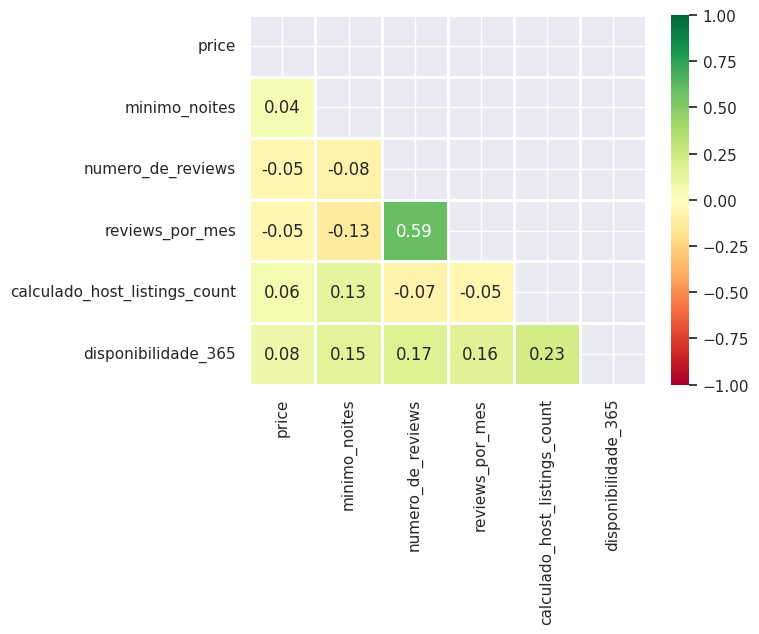

In [124]:
corr_df = num_data_df.corr(method='pearson', numeric_only=True)

# Criando um numpy array identico (like) a corr_df e preenchido com zeros, ele será usado para eliminar a parte triangular superio da matriz de correlação.
mask = np.zeros_like(corr_df)

# Função do pacote NumPy que dado um array ou matriz (quadrada), seleciona a parte triângular superior.
mask[np.triu_indices_from(mask)] = True

# Gerando gráfico
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2, annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.show()

Analisando a matriz de correlação, é possível notar que os dados não tem uma correlação clara, somente os dados sobre *review* tem uma fraca correlação. Isso irá dificultar o processo de predição.

### 2.5 Gere hipóteses de negócio com base na análise dos dados

In [130]:
!wget https://github.com/carneiro-fernando/lighthouse/raw/main/datasource/nymc.shp
!wget https://github.com/carneiro-fernando/lighthouse/raw/main/datasource/nymc.shx

--2024-02-07 02:30:52--  https://github.com/carneiro-fernando/lighthouse/raw/main/datasource/nymc.shp
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/carneiro-fernando/lighthouse/main/datasource/nymc.shp [following]
--2024-02-07 02:30:52--  https://raw.githubusercontent.com/carneiro-fernando/lighthouse/main/datasource/nymc.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1154516 (1.1M) [application/octet-stream]
Saving to: ‘nymc.shp.1’

nymc.shp.1          100%[===================>]   1.10M  --.-KB/s    in 0.04s   

2024-02-07 02:30:52 (30.2 MB/s) - ‘nymc.shp.1’ saved [1154516/1154516]

--202

In [134]:
nyc_map = geopandas.read_file("/content/nymc.shp")

In [142]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile do mapa de Nova York
nyc_map = gpd.read_file("/content/nymc.shp")

# Carregar o DataFrame contendo as coordenadas
# Supondo que seu DataFrame seja chamado 'df' e contenha as colunas 'latitude' e 'longitude'
# Substitua 'df' pelo nome do seu DataFrame, se necessário
# Substitua 'latitude' e 'longitude' pelos nomes das colunas no seu DataFrame, se necessário
# Certifique-se de que as coordenadas estão no mesmo sistema de referência espacial (SRS) que o shapefile
# Se não estiverem, você pode converter usando o método .to_crs() do geopandas
#nyc_map = nyc_map.to_crs(nyc_map.crs)
# Mas isso só é necessário se o SRS do DataFrame for diferente do SRS do shapefile
plt.figure(figsize=(10, 10))  # Define o tamanho da figura
ax = nyc_map.plot(color='lightgrey', edgecolor='black')  # Plotar o mapa de Nova York

# Plotar os pontos do DataFrame em cima do mapa
# Substitua 'df' pelo nome do seu DataFrame, se necessário
# Substitua 'latitude' e 'longitude' pelos nomes das colunas no seu DataFrame, se necessário
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red', alpha=0.5, s=5)

# Adicionar título e rótulos dos eixos
plt.title('Mapa de Nova York com Pontos de Coordenadas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostrar o gráfico
plt.show()


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

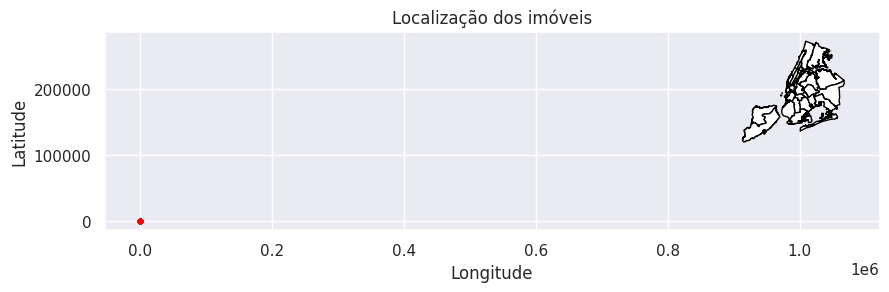

In [139]:
# prompt: Crie um mapa usando os poligonos do 'nyc_map' e as coordenadas ('latitude' e 'longitude') no dataframe

fig, ax = plt.subplots(figsize=(15, 10))
nyc_map.plot(ax=ax, color='white', edgecolor='black')
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red', s=10)
plt.title('Localização dos imóveis')
plt.show()


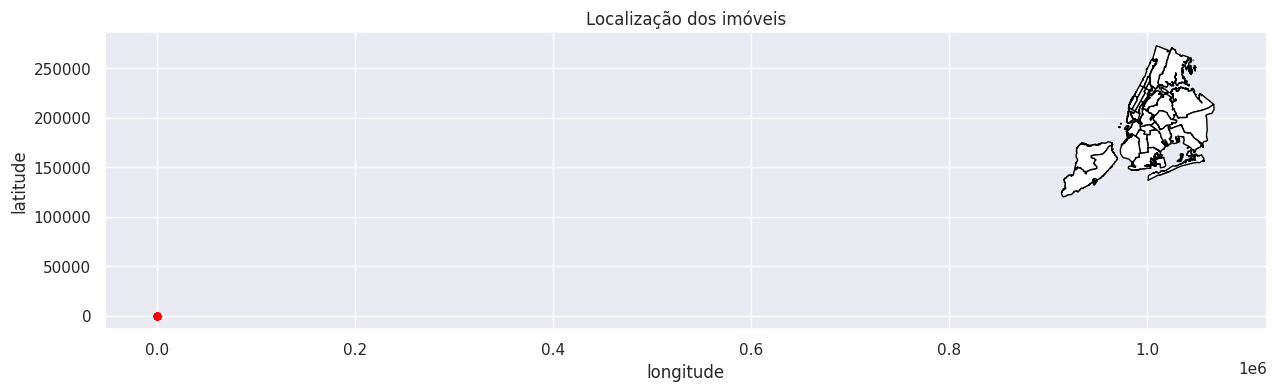

In [145]:
fig, ax = plt.subplots(figsize=(15, 10))
nyc_map.plot(ax=ax, color='white', edgecolor='black')

df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red')

plt.title('Localização dos imóveis')
plt.show()

In [148]:
print(nyc_map.crs)

None
